### The Use Case for Using Euclidean Distance to Calculate Similarity Between Images

#### Euclidean Distance returns images COMPOSED similarly. 
It's a terrible method for classifying objects, but works well if you want back images that look visually similar in composition. Such as a light subject hovering in a black background, or a scene of something floating in water with a 3/4 composition.

#### CIFAR-10 Dataset

Example image classification dataset: CIFAR-10. One popular toy image classification dataset is the CIFAR-10 dataset. This dataset consists of 60,000 tiny images that are 32 pixels high and wide. Each image is labeled with one of 10 classes (for example “airplane, automobile, bird, etc”). These 60,000 images are partitioned into a training set of 50,000 images and a test set of 10,000 images. In the image below you can see 10 random example images from each one of the 10 classes:

![CIFAR-10 dataset example](http://cs231n.github.io/assets/nn.jpg)

_Left: Example images from the CIFAR-10 dataset. Right: first column shows a few test images and next to each we show the top 10 nearest neighbors in the training set according to pixel-wise difference._


In [13]:
!pwd

/home/ubuntu/courses/deeplearning1/nbs


### Download the CIFAR-10 dataset

In [21]:
import os
directory = os.path.dirname('./data/lesson2_research/')
if not os.path.exists(directory):
    os.makedirs(directory)

In [22]:
if not os.path.exists(directory+'cifar-10-python.tar.gz'):
    !wget 'http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz' -P './data/lesson2_research/'

--2017-12-07 18:33:05--  http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘./data/lesson2_research/cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M   564KB/s    in 3m 52s  

2017-12-07 18:36:58 (717 KB/s) - ‘./data/lesson2_research/cifar-10-python.tar.gz’ saved [170498071/170498071]



In [23]:
# For whatever reason running tar from Jupyter doesn't actually unzip the file. Run the bash command from the terminal
if not os.path.exists(directory+'cifar-10-batches-py/'):
    !tar -xvzf './data/lesson2_research/cifar-10-python.tar.gz'

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [18]:
!cat 'cifar-10-batches-py/readme.html'

<meta HTTP-EQUIV="REFRESH" content="0; url=http://www.cs.toronto.edu/~kriz/cifar.html">


### Check some images

In [167]:
%matplotlib inline
import os
from matplotlib import pyplot as plt
import numpy as np
import time as t

[CIFAR documentation](http://www.cs.toronto.edu/~kriz/cifar.html)

In [68]:
# The CIFAR documentation says the data_batch files are Pickles, so...
def unpickle(file):
    import cPickle
    with open(file, 'rb') as fo:
        dict = cPickle.load(fo)
    return dict

In [69]:
# Just grab the first batch file
PATH = './data/lesson2_research/cifar-10-batches-py/data_batch_1'

In [70]:
datadict = unpickle(PATH)
datadict

{'batch_label': 'training batch 1 of 5',
 'data': array([[ 59,  43,  50, ..., 140,  84,  72],
        [154, 126, 105, ..., 139, 142, 144],
        [255, 253, 253, ...,  83,  83,  84],
        ..., 
        [ 71,  60,  74, ...,  68,  69,  68],
        [250, 254, 211, ..., 215, 255, 254],
        [ 62,  61,  60, ..., 130, 130, 131]], dtype=uint8),
 'filenames': ['leptodactylus_pentadactylus_s_000004.png',
  'camion_s_000148.png',
  'tipper_truck_s_001250.png',
  'american_elk_s_001521.png',
  'station_wagon_s_000293.png',
  'coupe_s_001735.png',
  'cassowary_s_001300.png',
  'cow_pony_s_001168.png',
  'sea_boat_s_001584.png',
  'tabby_s_001355.png',
  'muntjac_s_001000.png',
  'arabian_s_001354.png',
  'quarter_horse_s_000672.png',
  'passerine_s_000343.png',
  'camion_s_001895.png',
  'trailer_truck_s_000335.png',
  'dumper_s_000821.png',
  'alley_cat_s_000200.png',
  'accentor_s_000677.png',
  'frog_s_001671.png',
  'capreolus_capreolus_s_000051.png',
  'tomcat_s_000772.png',
  'picker

In [71]:
X = datadict['data'] 
Y = datadict['labels']

# Image's pixel values are stored flattened. So we need to reshape
print(X[0])
X[0].shape

[ 59  43  50 ..., 140  84  72]


(3072,)

In [73]:
# Docs say they're 32x32 images
X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
Y = np.array(Y)

In [155]:
print(X[0])
X[0].shape

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ..., 
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ..., 
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ..., 
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ..., 
 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ..., 
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ..., 
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ..., 
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


(32, 32, 3)

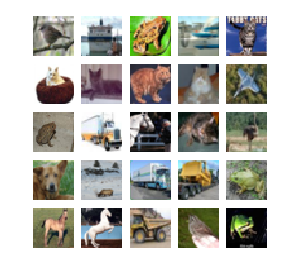

In [168]:
# Random CIFAR-10 images
fig, ax = plt.subplots(5,5,figsize=(3,3))
for j in range(5):
    for k in range(5):
        i = np.random.choice(range(len(X)))
        ax[j][k].set_axis_off()
        ax[j][k].imshow(X[i:i+1][0], interpolation='nearest') # using 'nearest' gets rid of the blur

## Calculate euclidean distances

In [139]:
import numpy as np

class NearestNeighbor(object):
    def __init__(self):
        self.most_similar = []

    def train(self, X, y):
        """ X is N x D where each row is an example. Y is 1-dimension of size N """
        # the nearest neighbor classifier simply remembers all the training data
        self.Xtr = X
        self.ytr = y

    def predict(self, X):
        """ X is N x D where each row is an example we wish to predict label for """
        num_test = X.shape[0]
        # lets make sure that the output type matches the input type
        Ypred = np.zeros(num_test, dtype = self.ytr.dtype)
        # loop over all test rows
        for i in xrange(num_test):
            # find the nearest training image to the i'th test image
            # using the euclidean distance
            distances = np.sqrt(np.sum(np.square(self.Xtr - X[i,:]), axis = 1))
            min_index = np.argmin(distances) # get the index with smallest distance
            Ypred[i] = self.ytr[min_index] # predict the label of the nearest example
        return Ypred
    
    def find_similar(self, X):
        num_test = X.shape[0]
        similar_imgs = []
        # loop over all test rows
        for i in xrange(num_test):
            # find the nearest training image to the i'th test image
            # using the euclidean distance
            distances = np.sqrt(np.sum(np.square(self.Xtr - X[i,:]), axis = 1))
            similar_imgs.append(np.argsort(distances))
        return np.array(similar_imgs)

In [83]:
X.shape

(10000, 32, 32, 3)

In [84]:
# Reshape back to original flat 3072 size in order to calculate distances
X_flat = X.reshape(10000, 3072)
X_flat.shape

(10000, 3072)

In [117]:
# Read in test batch
datadict2 = unpickle('./data/lesson2_research/cifar-10-batches-py/test_batch')
X_test = datadict2['data']
Y_test = datadict2['labels']
X_test.shape

(10000, 3072)

In [140]:
nn = NearestNeighbor()
nn.train(X_flat, Y)

In [141]:
similars = nn.find_similar(X_test[:5])
similars = similars[:,:5]
# Indices for top 5 most similar images from X train set
similars

array([[4748, 9905, 2959, 4411, 9341],
       [4645, 3842, 5132, 9523, 2379],
       [2574, 9824,  736, 2149, 6176],
       [5414, 5636,  695, 5614, 6232],
       [1935, 5296, 3948, 4861, 4113]])

#### The X[0] test image we fed into the model

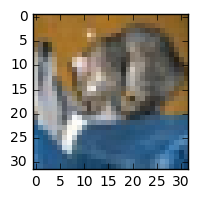

In [162]:
fig, ax = plt.subplots(1,1,figsize=(2,2))
ax.imshow(X_test.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")[0], interpolation='nearest')

#### The most similar images according to euclidean distance

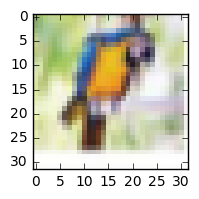

In [154]:
fig, ax = plt.subplots(1,1,figsize=(2,2))
ax.imshow(X[4748:4749][0], interpolation='nearest')

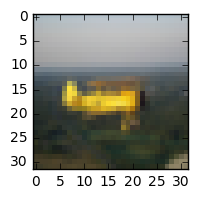

In [153]:
fig, ax = plt.subplots(1,1,figsize=(2,2))
ax.imshow(X[9905:9906][0], interpolation='nearest')

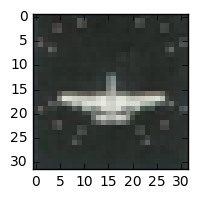

In [156]:
fig, ax = plt.subplots(1,1,figsize=(2,2))
ax.imshow(X[2959:2960][0], interpolation='nearest')

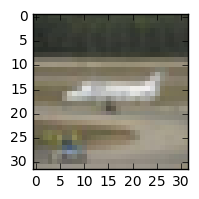

In [169]:
fig, ax = plt.subplots(1,1,figsize=(2,2))
ax.imshow(X[4411:4412][0], interpolation='nearest')

The test to train image similarities for this example do not make sense to me since the pixel brightness is inverted, and contrast is low for the test image compared to high contrast in the train images. Although the images from the training set appear similar with their light color blobs in the center. 

In [ ]:
reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")

#### The X[1] test image we fed into the model

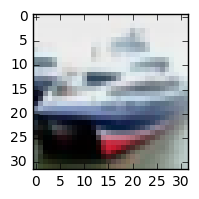

In [163]:
fig, ax = plt.subplots(1,1,figsize=(2,2))
ax.imshow(X_test.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")[1], interpolation='nearest')

#### The most similar images according to euclidean distance

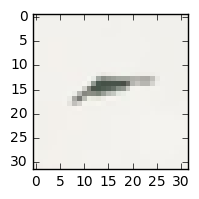

In [164]:
fig, ax = plt.subplots(1,1,figsize=(2,2))
ax.imshow(X[4645:4646][0], interpolation='nearest')

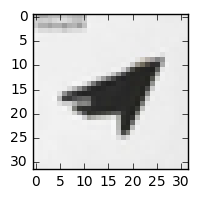

In [165]:
fig, ax = plt.subplots(1,1,figsize=(2,2))
ax.imshow(X[3842:3843][0], interpolation='nearest')

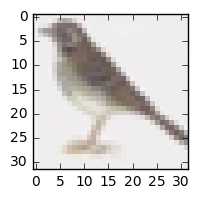

In [166]:
fig, ax = plt.subplots(1,1,figsize=(2,2))
ax.imshow(X[5132:5133][0], interpolation='nearest')

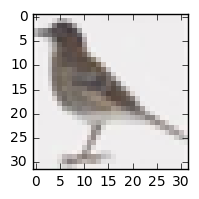

In [170]:
fig, ax = plt.subplots(1,1,figsize=(2,2))
ax.imshow(X[9523:9524][0], interpolation='nearest')

The test to train image similarities for this example as well do not make sense to me. Although the images from the training set appear similar with their darkly activated centers, and those two sequnetial birds. 

So I'm beginning to think the X_test images aren't in sequence with the X train images. Need to look into this.